In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import geopandas as gpd

In [2]:
from plotnine import *
from plotnine.animation import PlotnineAnimation
from IPython.display import HTML
import plotnine as pn
from mizani.formatters import percent_format


In [3]:
state_pop = {
    "UTTAR PRADESH": 199812341,
    "MAHARASHTRA": 112374333,
    "BIHAR": 104099452,
    "WEST BENGAL": 91276115,
    "MADHYA PRADESH": 72626809,
    "TAMIL NADU": 72147030,
    "RAJASTHAN": 68548437,
    "KARNATAKA": 61095297,
    "GUJARAT": 60439692,
    "ANDHRA PRADESH": 84580777,
    "ODISHA": 41974218,
    "KERALA": 33406061,
    "JHARKHAND": 32988134,
    "ASSAM": 31205576,
    "PUNJAB": 27743338,
    "CHHATTISGARH": 25545198,
    "HARYANA": 25351462,
    "DELHI UT": 16787941,
    "JAMMU & KASHMIR": 12541302,
    "UTTARAKHAND": 10086292,
    "HIMACHAL PRADESH": 6864602,
    "TRIPURA": 3673917,
    "MEGHALAYA": 2966889,
    "MANIPUR": 2855794,
    "NAGALAND": 1978502,
    "GOA": 1458545,
    "ARUNACHAL PRADESH": 1383727,
    "PUDUCHERRY": 1247953,
    "MIZORAM": 1097206,
    "CHANDIGARH": 1055450,
    "SIKKIM": 610577,
    "A & N ISLANDS": 380581,
    "D & N HAVELI": 343709,
    "DAMAN & DIU": 243247,
    "LAKSHADWEEP": 64473,
    "INDIA": 1210854977
}

# Breakdown of crime - Pie Chart 

In [4]:
df = pd.read_csv('/kaggle/input/crime-in-india/crime/crime/01_District_wise_crimes_committed_IPC_2001_2012.csv')
df = df[~df['DISTRICT'].str.contains('TOTAL', case=False)]
df = df.groupby('YEAR').sum()
df = df.drop(['STATE/UT', 'DISTRICT'], axis='columns')
df

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,36202,31523,3367,16075,0,16075,22487,14645,7842,6154,...,10534,271487,6851,34124,9746,49170,114,57182,701362,1769308
2002,35290,30380,3624,16373,3,16370,21850,14506,7344,6101,...,11820,265025,6822,33943,10155,49237,76,64044,730297,1780330
2003,32716,25942,4029,15847,1,15846,19992,13296,6696,5303,...,9365,261444,6208,32939,12325,50703,46,60672,700412,1716120
2004,33608,27890,3935,18233,2,18231,23327,15578,7749,5311,...,8637,276868,7026,34567,10001,58121,89,69423,741026,1832010
2005,32719,28031,3578,18359,7,18352,22832,15750,7082,5141,...,8451,270861,6787,34175,9984,58319,149,71698,741977,1822602
2006,32481,27230,3535,19348,2,19346,23991,17414,6577,4747,...,8480,264748,7618,36617,9966,63128,67,78513,779697,1878293
2007,32318,27401,3644,20737,1,20736,27561,20416,7145,4579,...,9024,273067,8093,38734,10950,75930,61,86790,829206,1989673
2008,32766,28598,3863,21467,0,21467,30261,22939,7322,4530,...,9249,284969,8172,40413,12214,81344,67,92186,856963,2093379
2009,32369,29038,3930,21397,2,21395,33860,25741,8119,4586,...,8736,279214,8383,38711,11009,89546,48,98532,865541,2121345


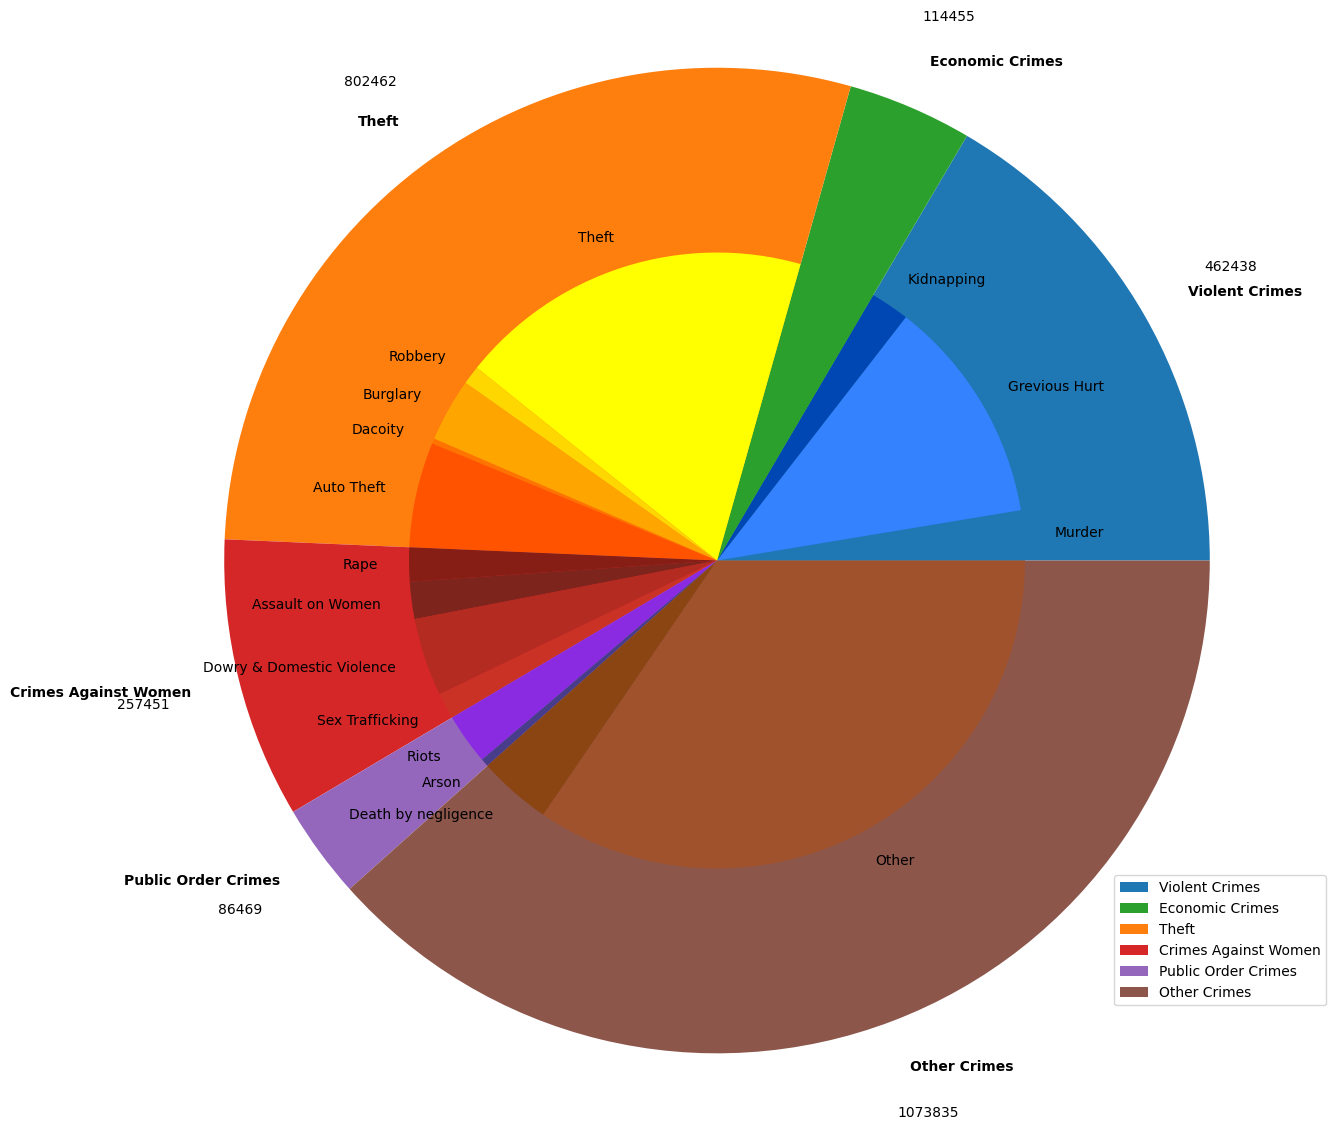

In [5]:
crime_classes = {
    'Violent Crimes' : ['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
                 'HURT/GREVIOUS HURT', 'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS'],
    'Economic Crimes' : ['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING'],
    'Theft' : ['ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY'],
    'Crimes Against Women' : ['RAPE', 'CUSTODIAL RAPE','OTHER RAPE', 
                            'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'DOWRY DEATHS', 
                            'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 
                            'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 
                            'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES'],
    'Public Order Crimes' : ['RIOTS', 'ARSON'],
    'Other Crimes' : ['CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES']

}

crime_sub_classes = {
    'Murder' : ['MURDER', 'ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'],
    'Grevious Hurt' : ['HURT/GREVIOUS HURT'],
    'Kidnapping' : ['KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS'],
    
    'Economic Crimes' : ['CRIMINAL BREACH OF TRUST','CHEATING', 'COUNTERFIETING'],
    
    'Theft' : ['THEFT', 'OTHER THEFT'],
    'Robbery' : ['ROBBERY'],
    'Burglary' : ['BURGLARY'],
    'Dacoity' : ['DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY'],
    'Auto Theft' : ['AUTO THEFT'],
    
    'Rape' : ['RAPE', 'CUSTODIAL RAPE','OTHER RAPE'],
    'Assault on Women' : ['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN'],
    'Dowry & Domestic Violence' : ['DOWRY DEATHS', 'CRUELTY BY HUSBAND OR HIS RELATIVES'],
    'Sex Trafficking' : ['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'],
    
    'Riots' : ['RIOTS'],
    'Arson' : ['ARSON'],
    
    'Death by negligence' : ['CAUSING DEATH BY NEGLIGENCE'],
    'Other' : ['OTHER IPC CRIMES']
}

df2 = df.copy()
for cl in crime_classes:
    df2[cl] = 0
    for crimes in crime_classes[cl]:
        df2[cl] += df2[crimes]
        
df2 = df2[list(crime_classes.keys())]

df3 = df.copy()
for cl in crime_sub_classes:
    df3[cl] = 0
    for crimes in crime_sub_classes[cl]:
        df3[cl] += df3[crimes]
        
df3 = df3[list(crime_sub_classes.keys())]

# cmap = plt.get_cmap()
# outer_colors = cmap(np.arange(6)*4)
outer_colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown']
inner_colors = ["#1f77b4", "#3582ff", "#0047b3", 'tab:green', '#FFFF00', '#FFD700', '#FFA500', '#FF7300', '#FF5300',
               '#861E16', '#7D241C','#B42B21', '#CB3226', '#8A2BE2', '#483D8B', '#8B4513', '#A0522D']

# Data for outer pie chart
labels_outer = list(df2.iloc[-1].keys())
sizes_outer = list(df2.iloc[-1])

# Data for inner pie chart
labels_inner = list(df3.iloc[-1].keys())
sizes_inner = list(df3.iloc[-1])

labels_inner[labels_inner.index("Economic Crimes")] = ""

# Create outer pie chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(sizes_outer, labels=labels_outer, radius=2,  colors=outer_colors, autopct='')
for i, (wedge, text) in enumerate(zip(wedges, texts)):
    angle = np.deg2rad((wedge.theta2 - wedge.theta1) / 2. + wedge.theta1)
    x = np.cos(angle)
    y = np.sin(angle)
    distance = 2.4
    x_text = wedge.center[0] + x * distance
    y_text = wedge.center[1] + y * distance
    ax.text(x_text, y_text, sizes_outer[i], color='black', ha='center', va='center')
    
for label in texts:
    label.set_fontweight('bold') 
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 0))
# Create inner pie chart
ax.pie(sizes_inner, labels=labels_inner, radius=1.25, colors=inner_colors)
plt.show()

# Crime statistics over time 

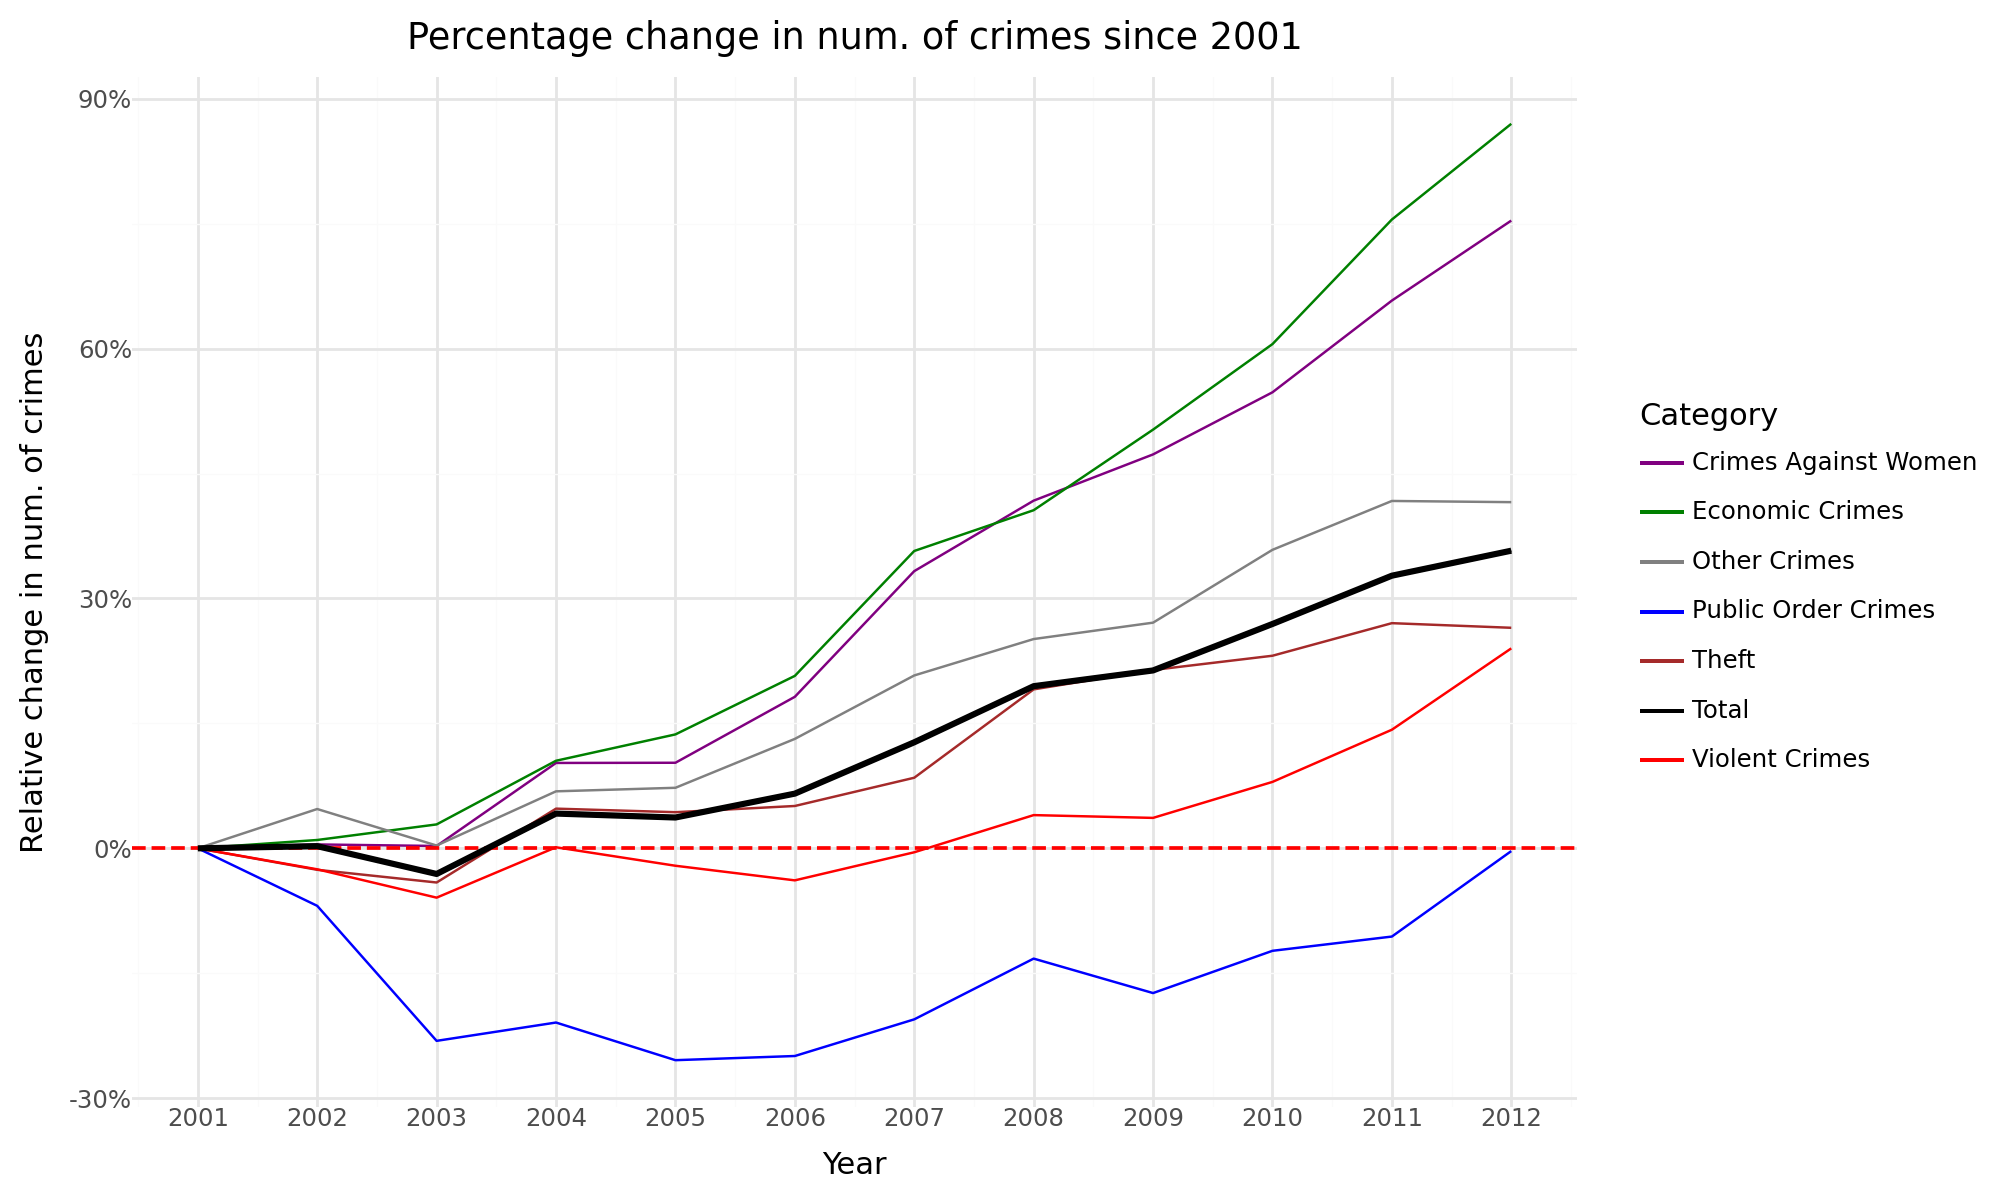

In [6]:
df = pd.read_csv('/kaggle/input/crime-in-india/crime/crime/01_District_wise_crimes_committed_IPC_2001_2012.csv')
for cl in crime_classes:
    df[cl] = 0
    for col in crime_classes[cl]:
        df[cl] += df[col]
        
df = df[['YEAR', 'STATE/UT', 'DISTRICT'] + list(crime_classes.keys())]
df['Total'] = df[list(crime_classes.keys())].sum(axis=1)
df = df[~df['DISTRICT'].str.contains('TOTAL', case=False)]

df_yearwise_total = df.groupby('YEAR').sum()[list(crime_classes.keys()) + ['Total']]

df_yearwise_total = ((df_yearwise_total/df_yearwise_total.iloc[0, :]) - 1)
df_yearwise_total = df_yearwise_total.reset_index()
df_yearwise_total_melt = pd.melt(df_yearwise_total, id_vars=['YEAR'], var_name='Category', value_name='value')

line_plot = ggplot(df_yearwise_total_melt) + geom_line(aes(x='YEAR', y='value', color='Category')) + pn.theme_minimal()
line_plot += pn.labs(x='Year', y='Relative change in num. of crimes', title='Percentage change in num. of crimes since 2001')
line_plot += pn.themes.theme(figure_size=(10,6))
line_plot += pn.theme(plot_title=pn.element_text(hjust=0.5))
line_plot += pn.geom_hline(yintercept=[0], linetype='dashed', color='red', size=0.75)
line_plot += pn.scale_color_manual(values={'Total': 'black', 'Crimes Against Women' : 'purple', 'Violent Crimes' : 'red', 'Economic Crimes' : 'green', 'Other Crimes' : 'grey', 'Theft' : 'brown', 'Public Order Crimes' : 'blue'})
line_plot += pn.geom_line(data=df_yearwise_total_melt[df_yearwise_total_melt['Category'] == 'Total'], mapping=aes(x='YEAR', y='value'), size=1.25, color='black')
line_plot += pn.scale_x_continuous(breaks=list(range(2001, 2013)))
line_plot += pn.scale_y_continuous(labels=percent_format()) 
line_plot.show()


# State-wise Crime

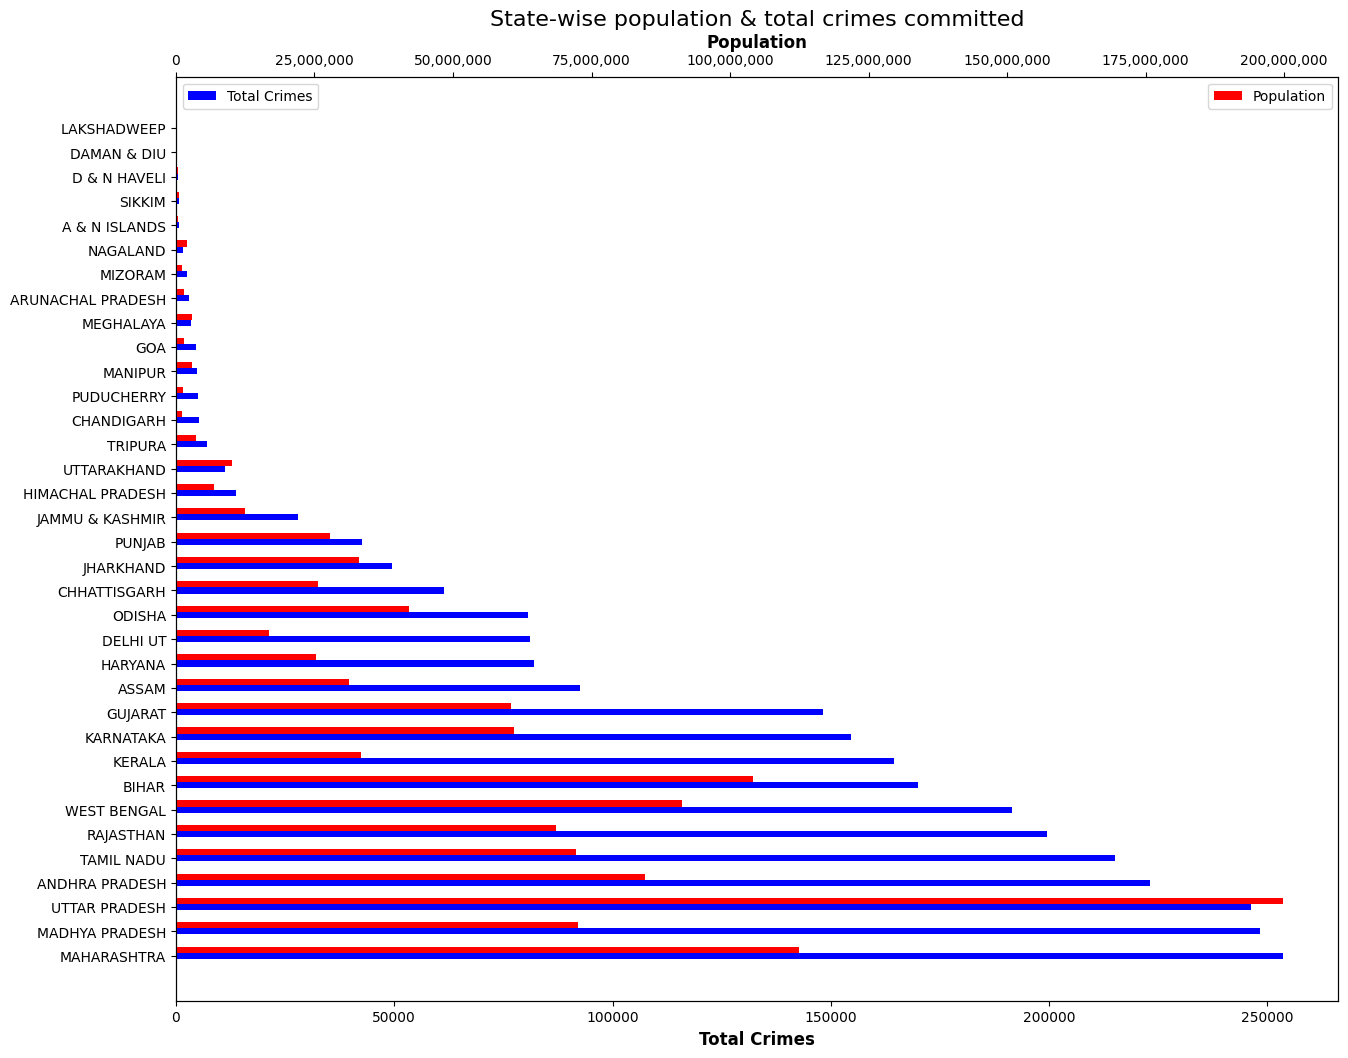

In [7]:
import matplotlib.ticker as ticker

state_crime_2001 = df[df['YEAR'] == 2001].groupby('STATE/UT').sum()[list(crime_classes.keys()) + ['Total']]
state_crime_2012 = df[df['YEAR'] == 2012].groupby('STATE/UT').sum()[list(crime_classes.keys()) + ['Total']]

state_crime_2012
state_crime_2012['Population'] = ''
for idx in state_crime_2012.index:
    state_crime_2012.loc[idx, 'Population'] = state_pop[idx.upper()] 
    
state_crime_2012 = state_crime_2012.sort_values('Total', ascending=False)

bar_width = 0.25
positions1 = np.arange(len(state_crime_2012))
positions2 = [pos + bar_width for pos in positions1]

fig, ax1 = plt.subplots(figsize=(15,12))

ax1.barh(positions1, state_crime_2012['Total'], bar_width, label='Total Crimes', color='b')

ax2 = ax1.twiny()
ax2.barh(positions2, state_crime_2012['Population'], bar_width, label='Population', color='r')

# Set labels and title
ax2.set_xlabel('Population', fontweight='bold', fontsize=12)
ax1.set_xlabel('Total Crimes', fontweight='bold', fontsize=12)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax1.set_yticks(positions1)
ax1.set_yticklabels(list(state_crime_2012.index))
ax1.set_title('State-wise population & total crimes committed', fontsize=16)

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Geographical Heatmap for state crime

/tmp/ipykernel_18/3124859129.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '203.37326351026456' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


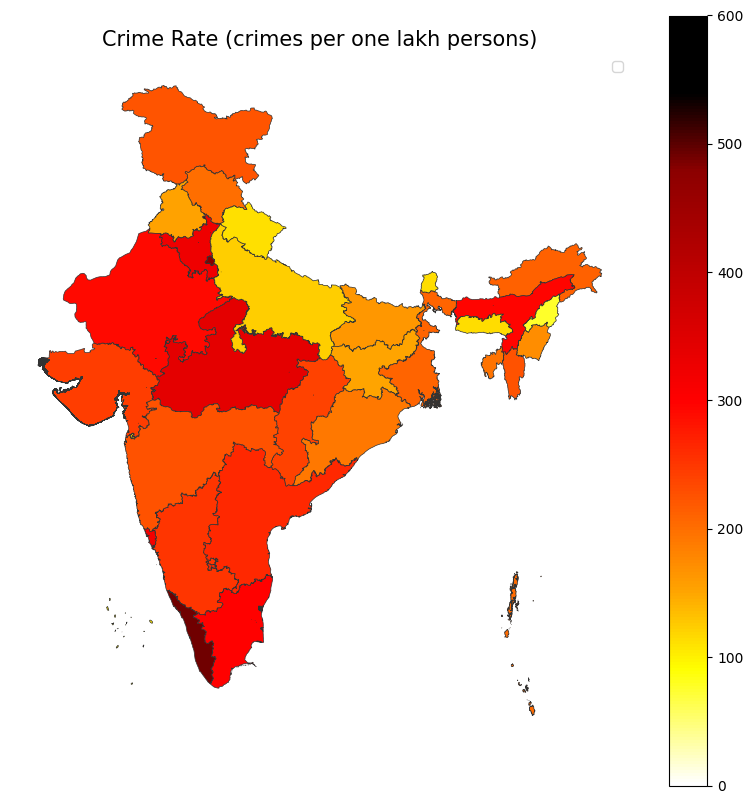

In [8]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf.loc[shp_gdf['st_nm']=='Andaman & Nicobar Island','st_nm'] = 'A & N ISLANDS'
shp_gdf.loc[shp_gdf['st_nm']=='Arunanchal Pradesh','st_nm'] = 'Arunachal Pradesh'
shp_gdf.loc[shp_gdf['st_nm']=='Dadara & Nagar Havelli','st_nm'] = 'D & N Haveli'
shp_gdf.loc[shp_gdf['st_nm']=='NCT of Delhi','st_nm'] ='DELHI UT'

state1 = shp_gdf[shp_gdf['st_nm'] == 'Andhra Pradesh']
state2 = shp_gdf[shp_gdf['st_nm'] == 'Telangana']
merged_state = state1.geometry.unary_union.union(state2.geometry.unary_union)

shp_gdf = shp_gdf[~shp_gdf['st_nm'].isin(['Andhra Pradesh', 'Telangana'])]
shp_gdf = gpd.GeoDataFrame(pd.concat([shp_gdf, gpd.GeoDataFrame({'st_nm': ['Andhra Pradesh'], 'geometry': [merged_state]}, crs=shp_gdf.crs)], ignore_index=True), crs=shp_gdf.crs)
shp_gdf['st_nm'] = shp_gdf['st_nm'].str.upper().replace('and', '&')

shp_gdf['Crime Rate'] = 0
for idx in shp_gdf.index:
    st = shp_gdf.loc[idx, 'st_nm']
    shp_gdf.loc[idx, 'Crime Rate'] = (state_crime_2012.loc[st, 'Total'] / state_crime_2012.loc[st, 'Population']) * 1e5
    
def plot_map(column,title,cmap):
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.axis('off')
    ax.set_title(title,fontdict={'fontsize': 15, 'fontweight' : 3})
    ax = shp_gdf.plot(column = column, cmap=cmap, linewidth=0.5, ax=ax, edgecolor='0.2',legend=True,vmin = 0,vmax=600,)
    legend = ax.legend()
    
norm = matplotlib.colors.Normalize(-1,1)
# colors = [[norm(-1.0), "white"],
#           [norm(-0.6), "yellow"],
#           [norm(-0.3), "orange"],
#           [norm(0), "red"],
#             [norm(0.8), "brown"],
#           [norm( 1.0), "black"]]

colors = [
    [norm(-1.0), "white"],
    [norm(-0.7), "yellow"],
    [norm(-0.5), "orange"],  # New color stop for stronger contrast
    [norm(0), "red"],    # New color stop for stronger contrast
    [norm(0.6), "darkred"],    # Modified color
    [norm(0.8), "black"],
    [norm(1.0), "black"]     # New color stop for stronger contrast
]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
plot_map('Crime Rate', 'Crime Rate (crimes per one lakh persons)', cmap)

# Statewise crime over time

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import imageio

state_crime_2001 = df[df['YEAR'] == 2001].groupby('STATE/UT').sum()[list(crime_classes.keys()) + ['Total']]
state_crime_2001['YEAR'] = 2001

state_crime = state_crime_2001.copy()
state_crime.iloc[:,:-1] = 0.0


os.mkdir('seq')
lis = []
for yr in range(2002, 2013):
    state_crime_yr = df[df['YEAR'] == yr].groupby('STATE/UT').sum()[list(crime_classes.keys()) + ['Total']]
    state_crime_yr = (state_crime_yr - state_crime_2001.iloc[:,:-1])/ state_crime_2001 * 100
    state_crime_yr = state_crime_yr.reset_index()
        
    frame = ggplot(state_crime_yr, aes(x='STATE/UT', y='Total', fill='Total > 0')) + geom_bar(stat='identity') + coord_flip() + theme_minimal()
    frame += pn.labs(x='State/UT', y='Relative change(%) in number of crimes committed', title=f'Relative change(%) in crimes committed from 2001 to {yr}')
    frame += pn.themes.theme(figure_size=(8, 8))
    frame += pn.theme(plot_title=pn.element_text(hjust=0.5))
    frame += pn.lims(y=(-100, 400))
    frame += scale_fill_manual(values=['green', 'red'])
    frame += pn.geom_hline(yintercept=[0], linetype='solid', color='black', size=1)
    frame += theme(legend_position='none')
    frame.save(f'seq/img_{yr}.jpeg', dpi=300)
    lis.append(frame)

image_files = sorted(os.listdir('seq'))  # Assuming the images are saved in the current directory
image_files = [image for image in image_files if image.endswith('.jpeg')]

images = []
for image_file in image_files:
    images.append(imageio.imread(f'seq/{image_file}'))

# Save the images as a GIF
# os.remove('animation.gif')
imageio.mimsave('animation.gif', images, fps=2)  # Adjust duration as needed

/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 8 in image.
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: seq/img_2002.jpeg
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 8 in image.
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: seq/img_2003.jpeg
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 8 in image.
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: seq/img_2004.jpeg
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 8 in image.
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: seq/img_2005.jpeg
/opt/conda/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 8 x 8 in image.
/opt/conda/lib/python3.10/site-packages/plot

# District 

/opt/conda/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


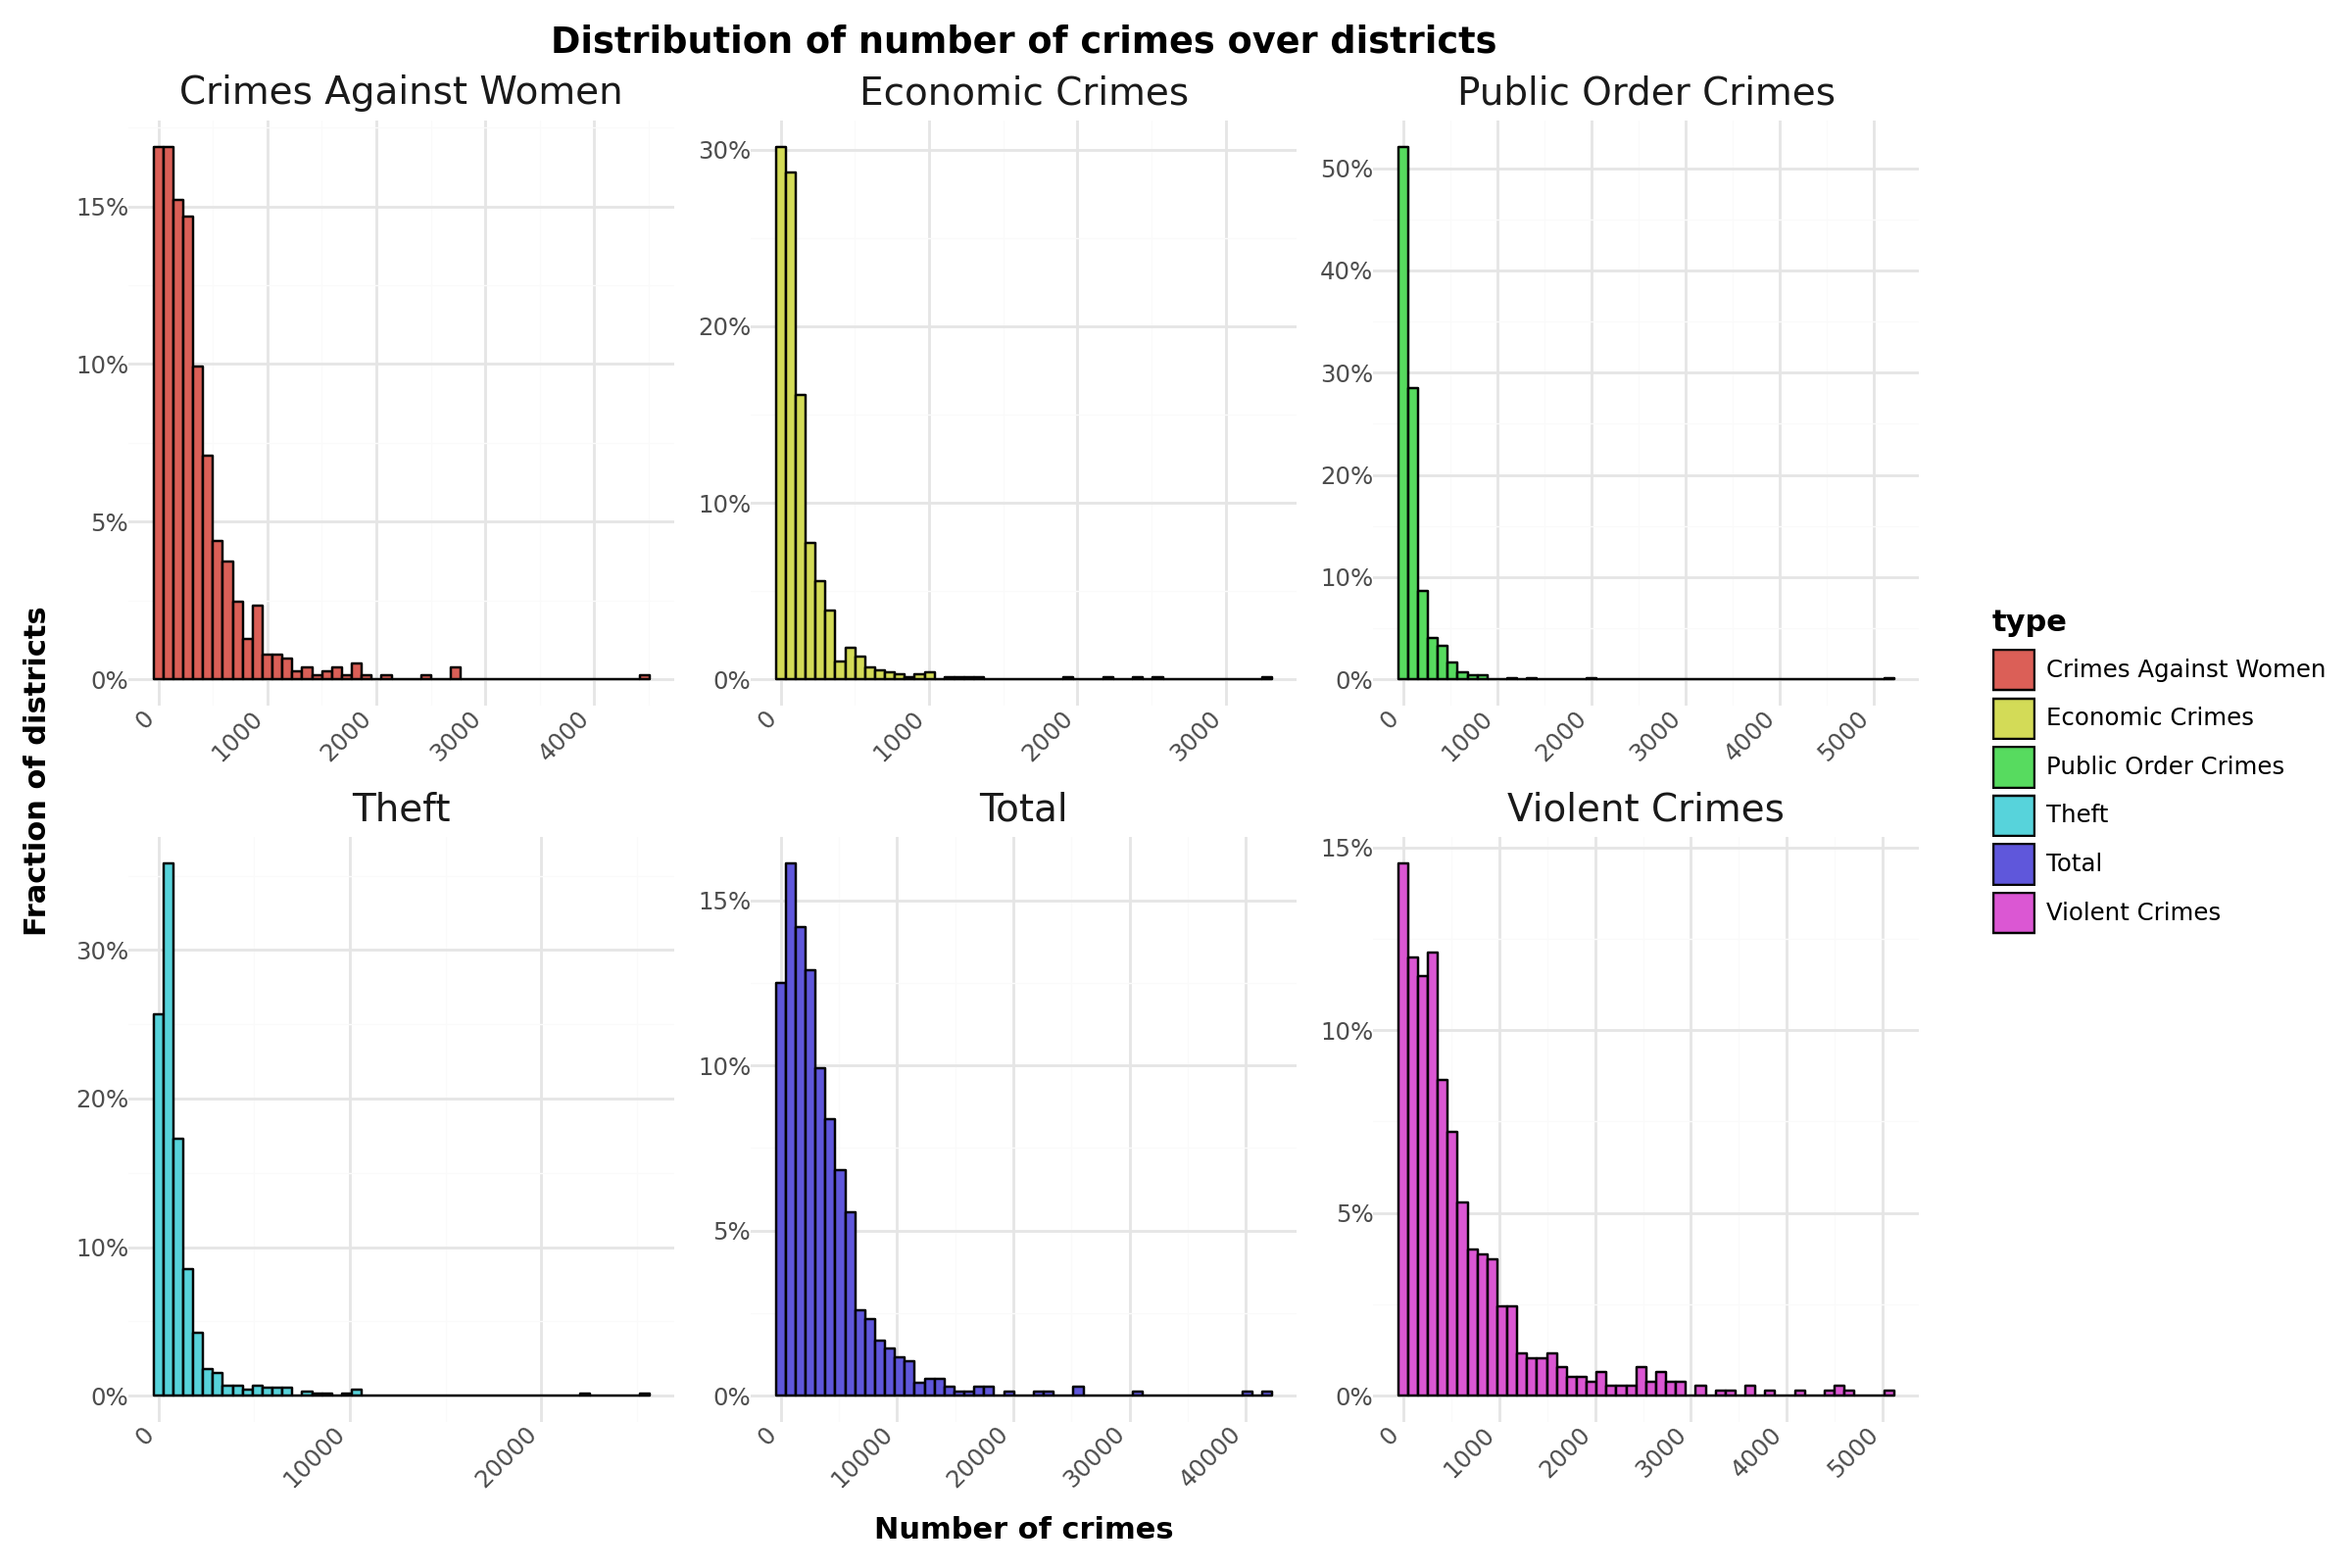

(<Figure Size: (1200 x 800)>,)

In [10]:
df_2012 = df[df['YEAR'] == 2012].reset_index(drop=True)

# dist_density = (
#     ggplot(df_2012, aes(x='Crimes Against Women', y=pn.after_stat('width*density')))
#     + pn.geom_histogram(fill='blue', colour='black', size=0.5)
#     + pn.scale_y_continuous(labels=percent_format()) 
#     + pn.theme_minimal()
#     + pn.labs(x='Number of crimes against women', y='Fraction of districts')
#     + pn.theme(figure_size=(6, 4))
#     + pn.geom_vline(xintercept=[df[df['YEAR'] == 2012]['Crimes Against Women'].sort_values().reset_index(drop=True)[int(0.95 * len(df[df['YEAR'] == 2012]))]], linetype='dashed', color='red', size=1)
# #     + pn.scale_x_continuous(breaks=list(range(0,5000,5000)))
# )

# dist_density

df_2012 = df_2012[['DISTRICT', 'Crimes Against Women', 'Violent Crimes', 'Theft', 'Public Order Crimes', 'Economic Crimes', 'Total']]
df_2012_melt = pd.melt(df_2012, id_vars='DISTRICT', var_name='type', value_name='value')

(
    ggplot(df_2012_melt, aes(x='value', y=pn.after_stat('width*density'), fill='type'))
    + pn.geom_histogram(colour='black', size=0.5, bins=50)
    + pn.scale_y_continuous(labels=percent_format()) 
    + pn.facet_wrap('~ type', scales='free')
    + pn.theme_minimal()
    + pn.labs(x='Number of crimes', y='Fraction of districts', title='Distribution of number of crimes over districts')
    + pn.theme(figure_size=(12, 8), axis_text_x=pn.element_text(rotation=45, hjust=1), strip_text=pn.element_text(size=14), title=element_text(weight='bold'))
), 
#     + pn.scale_x_continuous(breaks=list(range(0,5000,5000)))

/opt/conda/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 63'. Pick better value with 'binwidth'.


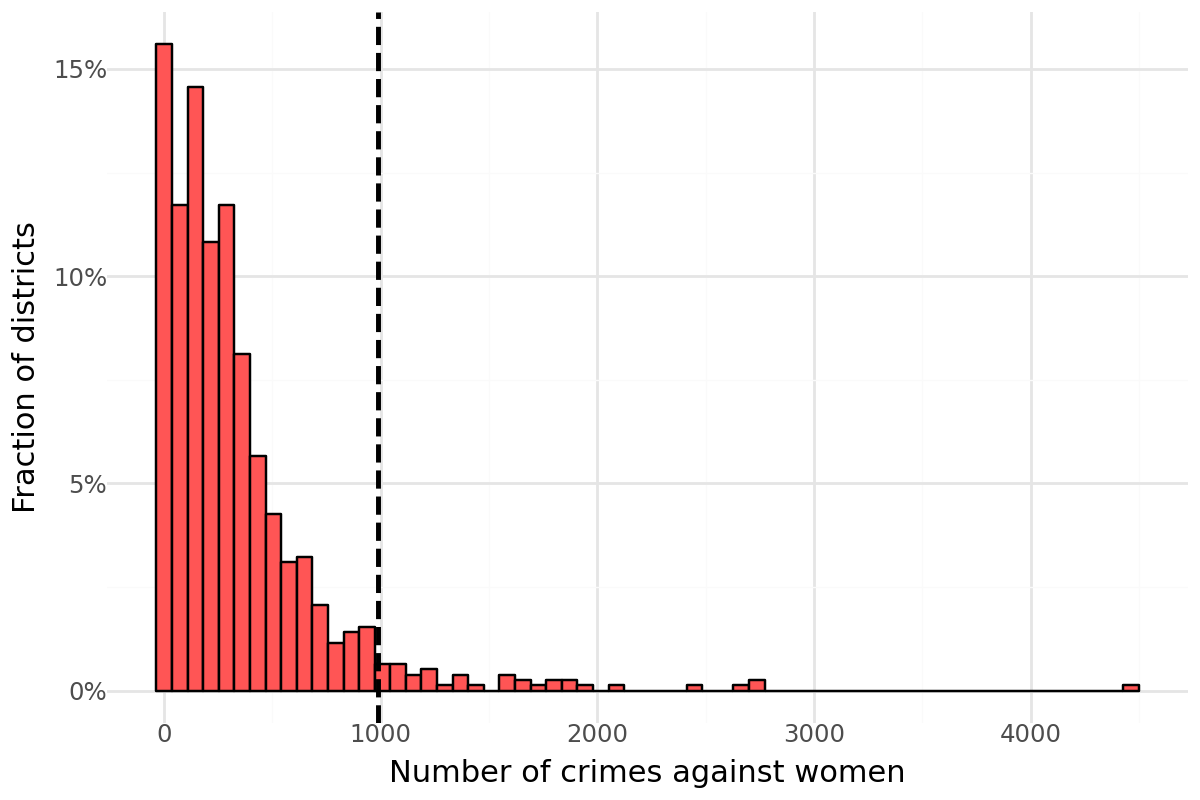

In [11]:
df_2012 = df[df['YEAR'] == 2012].reset_index(drop=True)

dist_density = (
    ggplot(df_2012, aes(x='Crimes Against Women', y=pn.after_stat('width*density')))
    + pn.geom_histogram(fill='#ff5555', colour='black', size=0.5)
    + pn.scale_y_continuous(labels=percent_format()) 
    + pn.theme_minimal()
    + pn.labs(x='Number of crimes against women', y='Fraction of districts')
    + pn.theme(figure_size=(6, 4))
    + pn.geom_vline(xintercept=[df[df['YEAR'] == 2012]['Crimes Against Women'].sort_values().reset_index(drop=True)[int(0.95 * len(df[df['YEAR'] == 2012]))]], linetype='dashed', color='black', size=1)
)

dist_density

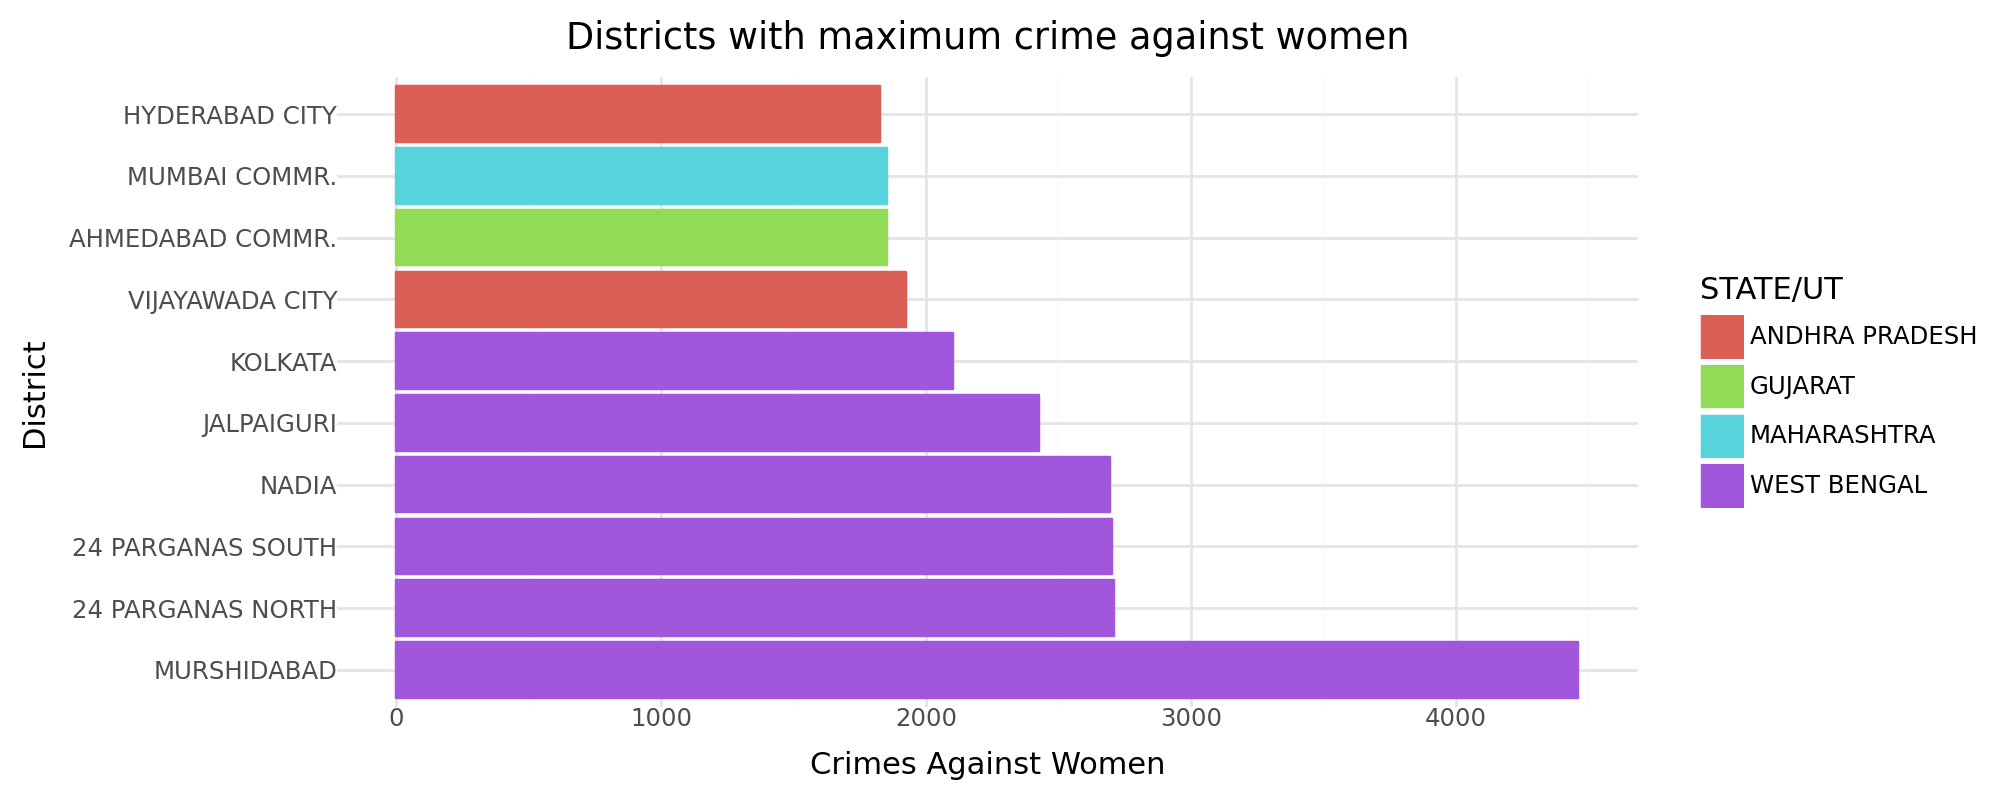

In [12]:
df_t10 = df_2012.sort_values('Crimes Against Women', ascending=False)[:10]

district_bar = (
    ggplot(df_t10, aes(x='DISTRICT', y='Crimes Against Women', fill='STATE/UT', color='STATE/UT'))
    + pn.scale_x_discrete(limits=list(df_t10['DISTRICT']))
    + pn.coord_flip()
    + pn.geom_bar(stat='identity')
    + pn.theme_minimal()
    + pn.labs(x='District', y='Crimes Against Women', title='Districts with maximum crime against women')
    + pn.theme(figure_size=(10, 4))
)
district_bar